# Applying various supervised ML algorithms using the provided dataset for predicting results and finding the best algorithm for the given dataset.

## Algorithms used:

1. Support Vector Machines
2. Logistic Regression
3. K Nearest Neighbour
4. Decision Tree
5. Naive Bayes
6. Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset = pd.read_csv("train_AV3.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
x = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]

In [5]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [6]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [7]:
dataset.columns[dataset.isnull().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [8]:
dataset["Gender"].fillna("0",inplace = True)
dataset["Married"].fillna("0",inplace = True)
dataset["Dependents"].fillna("0",inplace = True)
dataset["Self_Employed"].fillna("0",inplace = True)
dataset["LoanAmount"].fillna("0",inplace = True)
dataset["Loan_Amount_Term"].fillna("0",inplace = True)
dataset["Credit_History"].fillna("0",inplace = True)

In [9]:
dataset.columns[dataset.isnull().any()]

Index([], dtype='object')

In [10]:
x_encoded = LabelEncoder()
dataset["encoded_gender"] = x_encoded.fit_transform(dataset["Gender"])
dataset["encoded_married"] = x_encoded.fit_transform(dataset["Married"])
dataset["encoded_education"] = x_encoded.fit_transform(dataset["Education"])
dataset["encoded_property_area"] = x_encoded.fit_transform(dataset["Property_Area"])
dataset["encoded_self_employed"] = x_encoded.fit_transform(dataset["Self_Employed"])

In [11]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,encoded_gender,encoded_married,encoded_education,encoded_property_area,encoded_self_employed
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360,1,Urban,Y,2,1,0,2,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N,2,2,0,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y,2,2,0,2,2
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y,2,2,1,2,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y,2,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360,1,Rural,Y,1,1,0,0,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180,1,Rural,Y,2,2,0,0,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360,1,Urban,Y,2,2,0,2,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360,1,Urban,Y,2,2,0,2,1


In [12]:
dataset.drop(["Gender", "Married", "Education", "Property_Area", "Self_Employed"], axis=1, inplace=True)

In [13]:
dataset["Dependents"].replace("3+","3", inplace=True)

In [14]:
dataset

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,encoded_gender,encoded_married,encoded_education,encoded_property_area,encoded_self_employed
0,LP001002,0,5849,0.0,0,360,1,Y,2,1,0,2,1
1,LP001003,1,4583,1508.0,128,360,1,N,2,2,0,0,1
2,LP001005,0,3000,0.0,66,360,1,Y,2,2,0,2,2
3,LP001006,0,2583,2358.0,120,360,1,Y,2,2,1,2,1
4,LP001008,0,6000,0.0,141,360,1,Y,2,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,2900,0.0,71,360,1,Y,1,1,0,0,1
610,LP002979,3,4106,0.0,40,180,1,Y,2,2,0,0,1
611,LP002983,1,8072,240.0,253,360,1,Y,2,2,0,2,1
612,LP002984,2,7583,0.0,187,360,1,Y,2,2,0,2,1


In [15]:
x_new = dataset.drop(["Loan_ID", "Loan_Status"], axis=1)
y_new = dataset["Loan_Status"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.2, random_state = 1)

In [17]:
accuracy = {}

# Support Vector Machine

In [18]:
svm = SVC(kernel= "rbf", degree=2, gamma="auto", verbose = True, random_state =1)
svm.fit(x_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=True)

In [19]:
y_predict_svm = svm.predict(x_test)

In [20]:
confusion_matrix(y_test,y_predict_svm)

array([[ 0, 39],
       [ 0, 84]], dtype=int64)

In [21]:
accuracy_score(y_test, y_predict_svm)

0.6829268292682927

In [22]:
accuracy["SVM"]=accuracy_score(y_test, y_predict_svm)

# Logistic Regression

In [23]:
regressor = LogisticRegression(multi_class="ovr",random_state = 1)
regressor.fit(x_train, y_train)

C:\Users\PALLABI ROY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [24]:
y_predict_lr = regressor.predict(x_test)

In [25]:
confusion_matrix(y_test, y_predict_lr)

array([[18, 21],
       [ 5, 79]], dtype=int64)

In [26]:
accuracy_score(y_test, y_predict_lr)

0.7886178861788617

In [27]:
accuracy["Logistic Regression"] = accuracy_score(y_test, y_predict_lr)

In [28]:
regressor.predict_proba(x_test)

array([[0.66585761, 0.33414239],
       [0.64829963, 0.35170037],
       [0.23465134, 0.76534866],
       [0.22169325, 0.77830675],
       [0.15598706, 0.84401294],
       [0.69310701, 0.30689299],
       [0.24899071, 0.75100929],
       [0.26752145, 0.73247855],
       [0.30754919, 0.69245081],
       [0.65905717, 0.34094283],
       [0.16708546, 0.83291454],
       [0.33932997, 0.66067003],
       [0.21978874, 0.78021126],
       [0.23322757, 0.76677243],
       [0.22425913, 0.77574087],
       [0.2389088 , 0.7610912 ],
       [0.13179198, 0.86820802],
       [0.25342599, 0.74657401],
       [0.1768156 , 0.8231844 ],
       [0.21556044, 0.78443956],
       [0.21862687, 0.78137313],
       [0.17181759, 0.82818241],
       [0.23968363, 0.76031637],
       [0.2321353 , 0.7678647 ],
       [0.18607066, 0.81392934],
       [0.29331212, 0.70668788],
       [0.31276227, 0.68723773],
       [0.65530227, 0.34469773],
       [0.25593694, 0.74406306],
       [0.22875138, 0.77124862],
       [0.

# K Nearest Neighbor

In [29]:
cv = KFold(n_splits=3, shuffle=True, random_state=1)

In [30]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_new,dataset['Loan_Status'],cv=cv)
    accuracy_rate.append(score.mean())

In [31]:
accuracy_rate

[0.5603140443169138,
 0.5082097879802328,
 0.6059142356129443,
 0.5944922684520962,
 0.6384584728200223,
 0.6091582974653276,
 0.6531324725011957,
 0.6140363462458154,
 0.6498724693129284,
 0.6352144109676391,
 0.6612625538020086,
 0.6449625378606726,
 0.6612545831340665,
 0.6531085604973698,
 0.6775545990754024,
 0.6645384983261596,
 0.6726606089590307,
 0.6677745895106009,
 0.6807986609277856,
 0.6677745895106009,
 0.6661406025824964,
 0.6726685796269726,
 0.6726685796269726,
 0.6726685796269726,
 0.6742786545512512,
 0.6726606089590307,
 0.6759206121472978,
 0.6742786545512512,
 0.6775466284074604,
 0.6710266220309261,
 0.6759126414793558,
 0.6694006057707634,
 0.6824246771879482,
 0.6775466284074604,
 0.6840506934481109,
 0.6824246771879482,
 0.687302725968436,
 0.687302725968436,
 0.687302725968436]

In [32]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x_new,dataset['Loan_Status'],cv=cv)
    error_rate.append(1-score.mean())

In [33]:
error_rate

[0.4396859556830862,
 0.49179021201976725,
 0.39408576438705567,
 0.40550773154790376,
 0.3615415271799777,
 0.39084170253467243,
 0.34686752749880434,
 0.3859636537541846,
 0.3501275306870716,
 0.3647855890323609,
 0.3387374461979914,
 0.3550374621393274,
 0.3387454168659335,
 0.34689143950263024,
 0.3224454009245976,
 0.33546150167384037,
 0.3273393910409693,
 0.33222541048939913,
 0.3192013390722144,
 0.33222541048939913,
 0.3338593974175036,
 0.3273314203730274,
 0.3273314203730274,
 0.3273314203730274,
 0.32572134544874876,
 0.3273393910409693,
 0.3240793878527022,
 0.32572134544874876,
 0.3224533715925396,
 0.3289733779690739,
 0.3240873585206442,
 0.33059939422923657,
 0.3175753228120518,
 0.3224533715925396,
 0.31594930655188913,
 0.3175753228120518,
 0.312697274031564,
 0.312697274031564,
 0.312697274031564]

Text(0, 0.5, 'Error Rate')

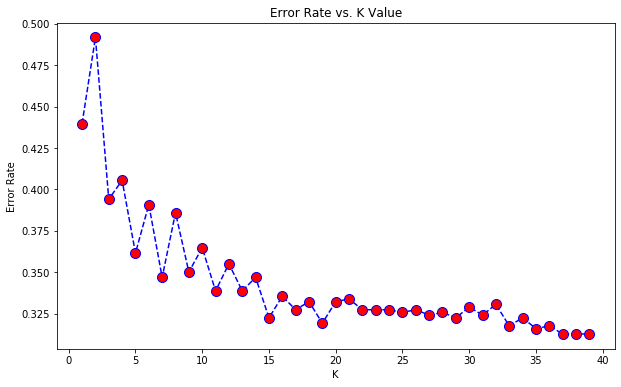

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=35)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [36]:
y_predict_knn = knn_model.predict(x_test)

In [37]:
confusion_matrix(y_test,y_predict_knn)

array([[ 0, 39],
       [ 0, 84]], dtype=int64)

In [38]:
accuracy_score(y_test,y_predict_knn)

0.6829268292682927

In [39]:
accuracy["KNN"] = accuracy_score(y_test, y_predict_knn)

# Decision Tree

In [40]:
decisiontree = DecisionTreeClassifier(criterion = "entropy", random_state= 1)
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [41]:
y_predict_tree = decisiontree.predict(x_test)

In [42]:
accuracy_score(y_test,y_predict_tree)

0.6829268292682927

In [43]:
accuracy["Decision Tree"] = accuracy_score(y_test, y_predict_tree)

In [44]:
confusion_matrix(y_test, y_predict_tree)

array([[16, 23],
       [16, 68]], dtype=int64)

# Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [46]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
y_pred_nb = gnb.predict(x_test)

In [48]:
confusion_matrix(y_test, y_pred_nb)

array([[13, 26],
       [ 7, 77]], dtype=int64)

In [49]:
accuracy_score(y_test, y_pred_nb)

0.7317073170731707

In [50]:
accuracy["Naive Bayes"] = accuracy_score(y_test, y_pred_nb)

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
accuracy_rate = []

for i in range(1,40):
    
    rand_forest = RandomForestClassifier(n_estimators=i)
    score=cross_val_score(rand_forest,x_new,dataset['Loan_Status'],cv=cv)
    accuracy_rate.append(score.mean())

In [53]:
error_rate = []

for i in range(1,40):
    
    rand_forest = RandomForestClassifier(n_estimators=i)
    score=cross_val_score(rand_forest,x_new,dataset['Loan_Status'],cv=cv)
    error_rate.append(1 - score.mean())

Text(0, 0.5, 'Error Rate')

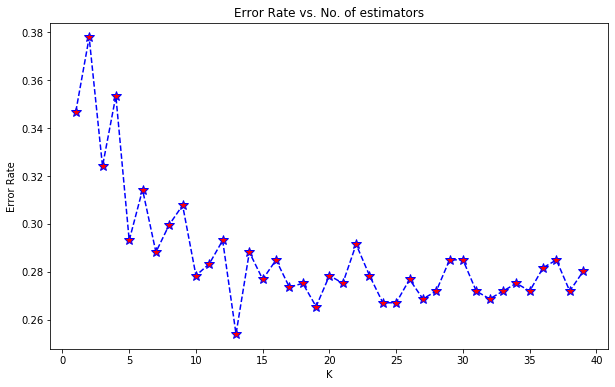

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='*',
        markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. No. of estimators')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
rand_forest_model = RandomForestClassifier(n_estimators = 35)
rand_forest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=35,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
y_pred_rf = rand_forest_model.predict(x_test)

In [57]:
confusion_matrix(y_test, y_pred_rf)

array([[15, 24],
       [ 8, 76]], dtype=int64)

In [58]:
accuracy_score(y_test, y_pred_rf)

0.7398373983739838

In [59]:
accuracy["RandomForest"] = accuracy_score(y_test, y_pred_rf)

# Checking the best model for this dataset

In [60]:
accuracy

{'SVM': 0.6829268292682927,
 'Logistic Regression': 0.7886178861788617,
 'KNN': 0.6829268292682927,
 'Decision Tree': 0.6829268292682927,
 'Naive Bayes': 0.7317073170731707,
 'RandomForest': 0.7398373983739838}

In [61]:
max(accuracy, key = accuracy.get)

'Logistic Regression'

In [62]:
min(accuracy, key = accuracy.get)

'SVM'

# Analysis

Since the accuracy of Logistic Regression is maximum and SVM is minimum, they are respectively the best and worst model.